In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
df=pd.read_csv(r'your_path\dataset1.csv')

In [3]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,y
0,0.768548,-0.812924,0.487731,0.676055,0.660635,-0.444268,-0.893640,0.156825,-0.876694,0.620652,...,0.438694,-0.019702,-0.600950,-0.877849,0.569724,-0.932564,0.290253,-0.763400,0.935585,-63.087329
1,-0.670920,-0.849962,-0.248050,0.960456,0.157492,0.792894,-0.586935,0.502329,0.981269,-0.620777,...,-0.281196,-0.885851,0.416578,-0.820090,0.539046,-0.602434,-0.507292,-0.717584,0.678476,-61.257623
2,0.031980,-0.803569,0.617597,0.846003,0.567892,0.360899,-0.531613,-0.677216,0.611557,0.917289,...,-0.104604,0.267912,-0.165641,0.509045,0.703101,0.427531,0.142499,-0.754593,-0.924559,-58.916994
3,0.157307,-0.764734,-0.823678,0.555114,-0.400031,-0.074208,-0.832775,0.881861,0.521265,0.413126,...,0.085894,-0.455087,0.662139,-0.846376,0.979447,-0.876542,-0.576039,0.242609,-0.890070,-56.749217
4,-0.476609,-0.707830,-0.474722,0.763908,-0.869485,-0.349489,-0.293731,0.929615,0.450917,-0.781646,...,-0.014800,0.404468,-0.225323,0.733259,0.470233,0.830019,0.199850,-0.435511,-0.277896,-56.247766


In [4]:
df.describe()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.015239,0.002455,0.012350,-0.021853,-0.005699,0.030694,0.016195,0.002731,-0.041889,-0.034891,...,0.000630,-0.014550,-0.002691,-0.026971,0.032099,-0.020810,-0.001286,0.007160,0.033056,1.032572
std,0.579666,0.575857,0.578428,0.562803,0.567329,0.585413,0.575098,0.580830,0.581383,0.581479,...,0.579899,0.581358,0.571397,0.577279,0.570002,0.572490,0.586571,0.567041,0.556633,21.459568
min,-0.999639,-0.999907,-0.999578,-0.997341,-0.997749,-0.997432,-0.999388,-0.999746,-0.999455,-0.999715,...,-0.999575,-0.997640,-0.998386,-0.999950,-0.999410,-0.993079,-0.999102,-0.998609,-0.999760,-63.087329
25%,-0.515578,-0.512347,-0.488257,-0.492955,-0.479871,-0.476162,-0.473717,-0.495279,-0.548818,-0.552028,...,-0.503873,-0.533043,-0.499724,-0.524747,-0.454333,-0.502945,-0.533903,-0.480978,-0.444436,-14.254513
50%,-0.006295,0.013728,0.040301,-0.022134,-0.007999,0.054535,0.006247,-0.024722,-0.062433,-0.039670,...,-0.008584,-0.022289,0.010255,-0.034473,0.023374,-0.059977,-0.009772,0.012218,0.041591,1.431842
75%,0.463495,0.497554,0.510812,0.426922,0.473263,0.558355,0.496908,0.510023,0.473278,0.472946,...,0.527520,0.471522,0.498615,0.466222,0.532116,0.486100,0.513547,0.480789,0.521005,16.936206
max,0.999663,0.999737,0.992472,0.999806,0.998955,0.996246,0.999716,0.998040,0.999384,0.999262,...,0.998586,0.997789,0.999548,0.997747,0.997131,0.998377,0.999819,0.999434,0.994621,62.620466


### part (a): To see how the populatiton size affect the model's performance, randomly take samples of size 100, 150, 200, ...., 950, 1000 (i.e., incrementing sample sizes by 50) from the given dataset, apply train-test split (%70 train-%30 test), fit a multiple linear regression model, evaluate the mean square performance of the model on the train and test sets and plot results.

In [5]:
#  create dataframe whıch have information about errors, models and size of our population.
results = pd.DataFrame(columns =['train_error', 'test_error', 'model', 'size']).set_index('size')  


print ('Randomly take samples of size 50 to 1000=>')
for size in range(50,1001, 50):   #ramdomly take samples 50 to 1000 sizes
    sample = df.sample(n=size, random_state=1)
    X = sample.iloc[:, :-1].values   # take featues
    y = sample.iloc[:, -1].values    # take target variable
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)  # split data into test and train
    
    regressor = LinearRegression()    # using regression model
    regressor.fit(X_train, y_train)   # fit model
    
    y_pred = regressor.predict(X_test)  #prediction for test data
    
    y_pred_train = regressor.predict(X_train)   #prediction for train data
    
    test_error = metrics.mean_squared_error(y_test, y_pred)    #mean square error for test data
    train_error = metrics.mean_squared_error(y_train, y_pred_train)   # mean square error for train data
    
    results.loc[size] = train_error, test_error, regressor   # adding our infos into results dataframe.
    
results

    #print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred))

Randomly take samples of size 50 to 1000=>


,train_error,test_error,model
size,,,
50,9.809585e-28,74.544390,LinearRegression()
100,2.695500e+00,14.766978,LinearRegression()
150,3.822463e+00,9.379023,LinearRegression()
200,5.064987e+00,8.260727,LinearRegression()
250,4.839934e+00,10.628142,LinearRegression()
300,5.650585e+00,10.181128,LinearRegression()
350,5.983976e+00,8.404781,LinearRegression()
400,5.563155e+00,9.818694,LinearRegression()
450,5.897382e+00,7.667577,LinearRegression()


Text(0.5, 1.0, 'part (a) train-testing errors')

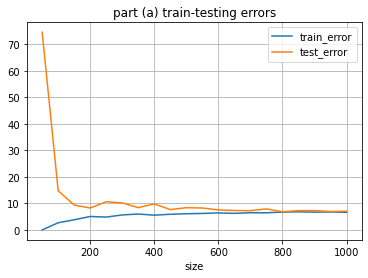

In [6]:
# vizulation our results:
results.plot()
plt.grid()
plt.title("part (a) train-testing errors")

with plotting training and testing errors we can see model size and their changing. we can see that in first step until 200 size population, test error decreasing dramaticly but train error increases a little. and they go like stable after 200 size. we can say that sıze of 200 is enough for our dataset.
With more pupulation, test_error is decreasing. The learning curve working in your advantage, ie. you can train better models given more data for testing thus test_error is decreasing. Moreover, train_error increasing because it is harder for the model (with a fixed complexity) to overfit to a bigger training set. After one point, performance stay same. In some situation, increasing the number of population does not means to improve performance of model.

### part(b): Repeat part (a) after applying polynomial expansion with degree=2 and set to the given dataset.

In [7]:
#  create dataframe whıch have information about errors, models and size of our population.
results1 = pd.DataFrame(columns =['train_error1', 'test_error1', 'model1', 'size1']).set_index('size1')

for size in range(50,1000, 50):
    sample = df.sample(n=size, random_state=1)
    X = sample.iloc[:, :-1].values
    y = sample.iloc[:, -1].values
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)
    
    regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    
    y_pred_train = regressor.predict(X_train)
    
    test_error = metrics.mean_squared_error(y_test, y_pred)
    train_error = metrics.mean_squared_error(y_train, y_pred_train)
    
    results1.loc[size] = train_error, test_error, regressor
    
    
    #print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred))

In [9]:
results1

,train_error1,test_error1,model1
size1,,,
50,2.062697e-26,182.518866,"(PolynomialFeatures(), LinearRegression(fit_in..."
100,5.197889e-27,259.151633,"(PolynomialFeatures(), LinearRegression(fit_in..."
150,2.152287e-27,233.031456,"(PolynomialFeatures(), LinearRegression(fit_in..."
200,3.450992e-27,214.910863,"(PolynomialFeatures(), LinearRegression(fit_in..."
250,3.783241e-27,216.374402,"(PolynomialFeatures(), LinearRegression(fit_in..."
300,4.619606e-27,167.671730,"(PolynomialFeatures(), LinearRegression(fit_in..."
350,2.630606e-27,161.324026,"(PolynomialFeatures(), LinearRegression(fit_in..."
400,6.532476e-27,129.533477,"(PolynomialFeatures(), LinearRegression(fit_in..."
450,8.949015e-27,126.963729,"(PolynomialFeatures(), LinearRegression(fit_in..."


Text(0.5, 1.0, 'part (b) train-testing errors')

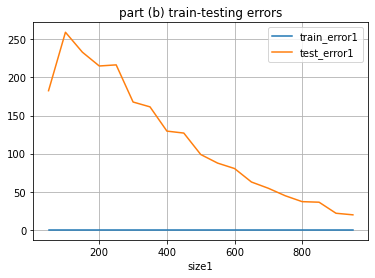

In [10]:
results1.plot()
plt.grid()
plt.title("part (b) train-testing errors")

the train error stays same so there can be overfitting. As sample size is incresing, the overfitting issue may be overcomed. The learning curve working in your advantage, ie. you can train better models given more data for testing thus test error is decreasing. We can change degrre of polynomial expention¶

### part(c): Use Lasso regularization and try to fit the best possible model to the given dataset. Use (%70 train - %30 test) splits.

In [11]:
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

model_lasso = Lasso(alpha=0.01)

model_lasso.fit(X_train, y_train) 

pred_train_lasso= model_lasso.predict(X_train)

print("Mean Square Error for training",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("R2 for training",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)

print("Mean Square Error for testing",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("R2 for testing",r2_score(y_test, pred_test_lasso))

Mean Square Error for training 2.6045214337006177
R2 for training 0.9852870968560583
Mean Square Error for testing 2.610076780873246
R2 for testing 0.9852783880282705


we can see that in lasso model, we havre alpha = 0.01. if we increse the alpha our coefficents goes to the zero but our erros (mse,r2) will same similar.